In [ ]:
!pip install  
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d NIH Chest X-rays


usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: unrecognized arguments: Database


In [ ]:
!kaggle competitions download -c nih-chest-xrays

403 - Forbidden - Permission 'competitions.participate' was denied


In [1]:
# # Step 1: Install Kaggle API
# # Step 1: Install Kaggle API
# !pip install kaggle

# # Step 2: Upload Kaggle API Token
# from google.colab import files
# files.upload()

# # Step 3: Configure Kaggle API Credentials
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# https://www.kaggle.com/datasets/nih-chest-xrays/data/data?select=Data_Entry_2017.csv

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img = cv2.imread('/content/com/datasets/nih-chest-xrays/data/Normal/images/Normal-1.png')

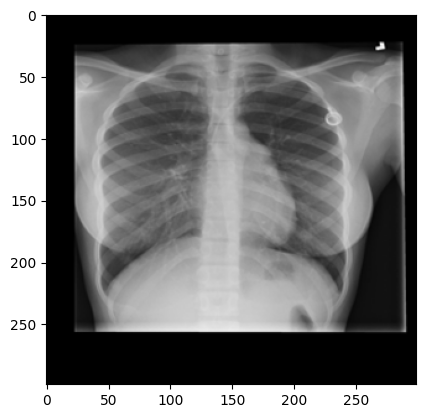

In [ ]:
plt.imshow(img)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os

In [ ]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [ ]:
nih_path = "/content/com/datasets/nih-chest-xrays/data/images"
nih_Url = os.listdir(nih_path)
nih_Images, nih_Targets = loadImages(nih_path, nih_Url, 1)

In [ ]:
len(nih_Url), len(nih_Images)

(3616, 3616)

In [ ]:
normal_path = "/content/com/datasets/nih-chest-xrays/data/Normal/images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [ ]:
targets = np.r_[nih_Targets, normalTargets]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

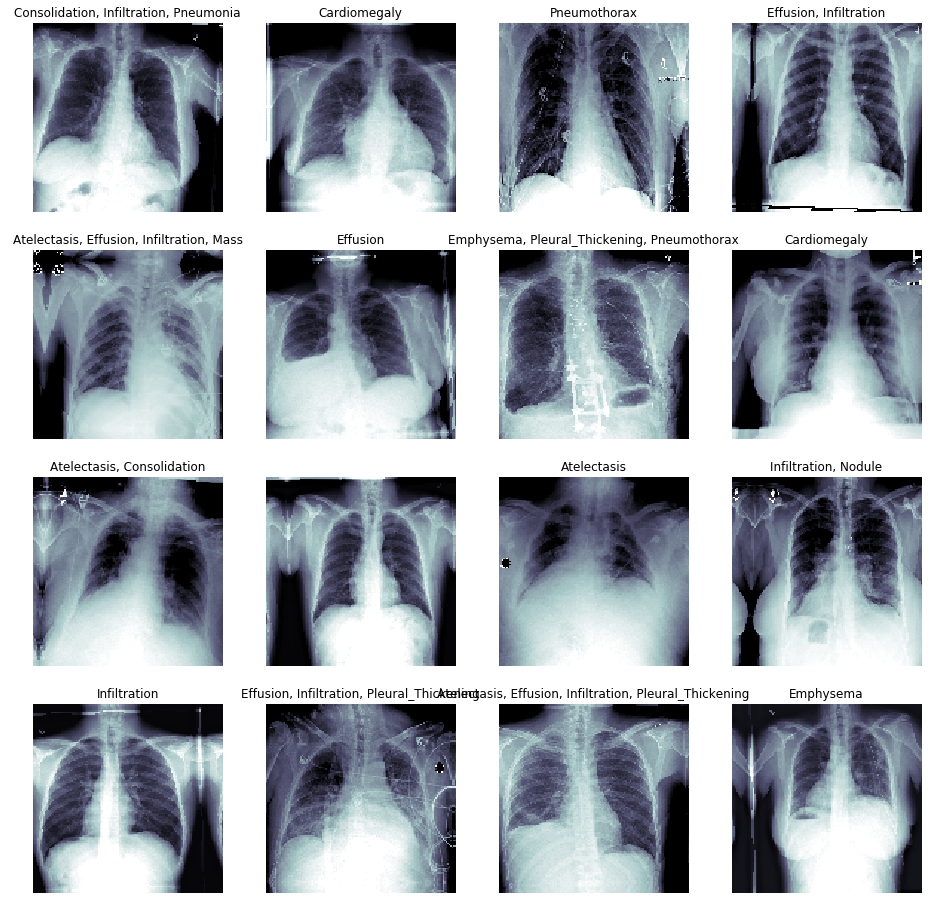

In [ ]:
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 16)        0

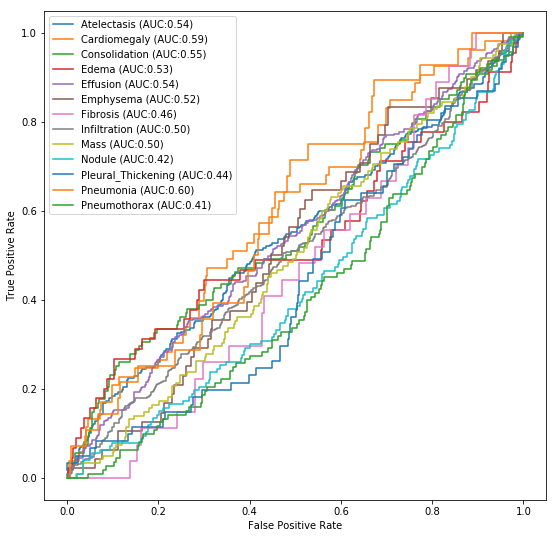

In [ ]:
from sklearn.metrics import auc, roc_curve

fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
324/324 [==============================] - 10s 12ms/step - loss: 0.3969 - accuracy: 0.8218 - val_loss: 0.3045 - val_accuracy: 0.8630
Epoch 2/5
324/324 [==============================] - 2s 7ms/step - loss: 0.2666 - accuracy: 0.8893 - val_loss: 0.2448 - val_accuracy: 0.8905
Epoch 3/5
324/324 [==============================] - 2s 7ms/step - loss: 0.2091 - accuracy: 0.9164 - val_loss: 0.1858 - val_accuracy: 0.9293
Epoch 4/5
324/324 [==============================] - 2s 7ms/step - loss: 0.1708 - accuracy: 0.9303 - val_loss: 0.1764 - val_accuracy: 0.9267
Epoch 5/5
324/324 [==============================] - 2s 7ms/step - loss: 0.1324 - accuracy: 0.9479 - val_loss: 0.1649 - val_accuracy: 0.9308


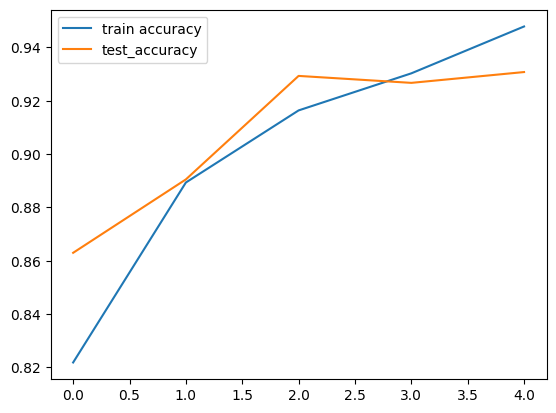

In [ ]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

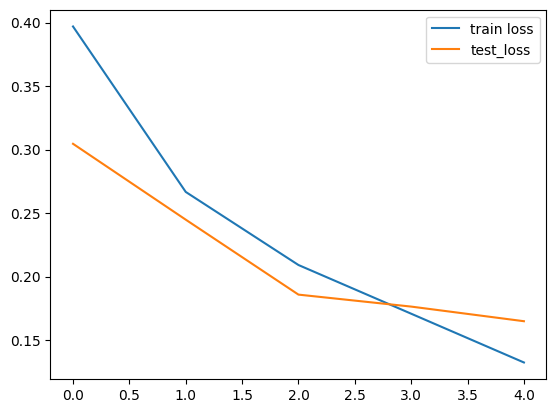

In [ ]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

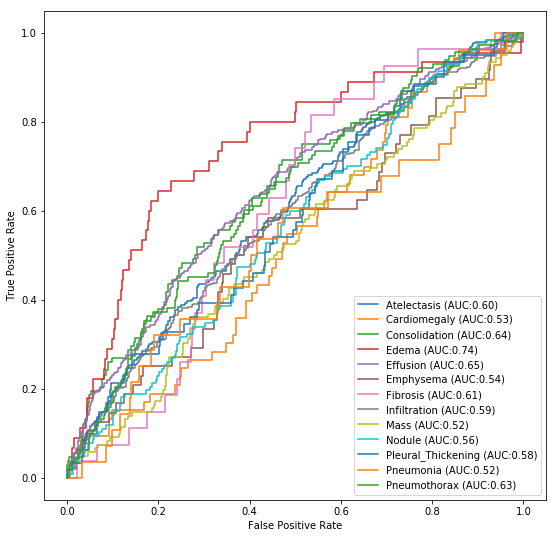

In [ ]:
from sklearn.metrics import auc, roc_curve

fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('trained_net.png')

In [ ]:
# prompt: also find f1 score precision and confusion matric

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)

f1_score = classification_report(y_test, np.round(y_pred), output_dict=True)['1']['f1-score']
precision = classification_report(y_test, np.round(y_pred), output_dict=True)['1']['precision']
confusion_matrix = confusion_matrix(y_test, np.round(y_pred))

print("f1 score:", f1_score)
print("precision:", precision)
print("confusion matrix:", confusion_matrix)

108/108 [==============================] - 0s 3ms/step
f1 score: 0.8625646923519262
precision: 0.8971291866028708
confusion matrix: [[2463   86]
 [ 153  750]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
threshold = 0.5

In [ ]:
y_pred_binary = [1 if prob >= threshold else 0 for prob in y_pred]

In [ ]:
cm = confusion_matrix(y_test, y_pred_binary)

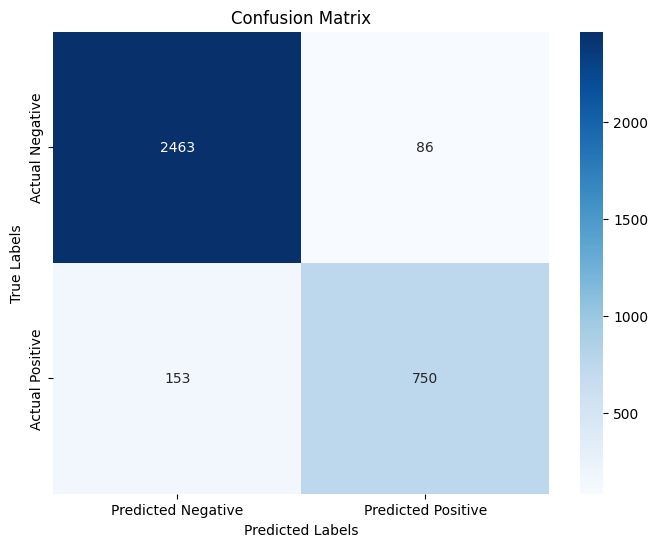

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# prompt: save the model

model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
